STEPS IN CODING

1. Getting X(attributes).
2. Converting Y(Gini index) to around 10 classes,
   each with a range of values.
3. Getting Y(class variable).
4. Obtaining training, testing and validation sets with
   X and Y.
5. Creating a NN model

We are expected at a minimum to complete the above tasks for the Midterm.


In [ ]:
#@title Default title text
#Shanmukh & Bhargav
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# New Section

In [ ]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler


dataset = pd.read_csv('gdrive/MyDrive/Deep Learning/Dataset 1.csv')

X = dataset.iloc[:,:8].values
Y = dataset.iloc[:, -1].values
print("Dataset used\n",dataset)
print(X)

Dataset used
      Year  Quarter  CPI-AllUrbanConsumers  National_Debt  \
0    1960        1              29.396667         320900   
1    1960        2              29.573333         320900   
2    1960        3              29.590000         320900   
3    1960        4              29.780000         320900   
4    1961        1              29.840000         320901   
..    ...      ...                    ...            ...   
243  2020        4             260.879000       27747798   
244  2021        1             263.524667       28132570   
245  2021        2             268.760333       28529436   
246  2021        3             273.163333       28428919   
247  2021        4             278.413333       29617215   

     Federal Minimum Wage Rates        GDP  Long Term Interest Rate  \
0                          1.00    542.648                 4.556667   
1                          1.00    541.080                 4.513333   
2                          1.00    545.604          

In [ ]:

#Adith
label = LabelEncoder()
Y=label.fit_transform(Y)
Y=pd.get_dummies(Y).values


In [ ]:
# Added by Rohith on 10/27/2022

from sklearn.model_selection import train_test_split
X_main, X_test, Y_main, Y_test = train_test_split(X, Y, test_size=0.2) # splitting test data to 20%
X_train, X_val, Y_train, Y_val = train_test_split(X_main,Y_main,test_size=0.2) # splitting training and validation sets
print("Training data X(Attributes) - ",X_train.shape)
print("Training data Y(Gini values) - ",Y_train.shape)
print("Testing data X(Attributes) - ",X_test.shape)
print("Testing data Y(Gini values) - ",Y_test.shape)
print("Validation data X(Attributes) - ",X_val.shape)
print("Validation data Y(Gini values) - ",Y_val.shape)


Training data X(Attributes) -  (158, 8)
Training data Y(Gini values) -  (158, 9)
Testing data X(Attributes) -  (50, 8)
Testing data Y(Gini values) -  (50, 9)
Validation data X(Attributes) -  (40, 8)
Validation data Y(Gini values) -  (40, 9)


In [ ]:
gini_test = np.empty(50,dtype=int)
for i in range(50):
  gini_test[i]= np.argmax(Y_test[i])
gini_test = label.inverse_transform(gini_test)
print("Test data gini values\n",gini_test)

Test data gini values
 [0.4  0.4  0.41 0.35 0.37 0.37 0.34 0.42 0.41 0.41 0.35 0.37 0.35 0.41
 0.35 0.4  0.42 0.35 0.4  0.35 0.38 0.35 0.38 0.41 0.42 0.4  0.42 0.38
 0.41 0.4  0.41 0.42 0.35 0.35 0.42 0.42 0.4  0.35 0.35 0.38 0.38 0.35
 0.35 0.35 0.38 0.41 0.35 0.34 0.35 0.4 ]


In [ ]:
#Adith
year = X_test[:,0]
quarter = X_test[:,1]

scaled = StandardScaler()
scaled.fit(X_train)
X_train = scaled.transform(X_train)
X_test = scaled.transform(X_test)
X_val = scaled.transform(X_val)
print("Training X attributes after Scaling\n",X_train)

[1993. 1998. 2014. 1969. 1984. 1983. 1962. 2021. 2013. 2007. 1974. 1983.
 1980. 2003. 1965. 1999. 2019. 1980. 1997. 1968. 1988. 1977. 1989. 2005.
 2016. 1997. 2017. 1990. 2005. 1996. 2011. 2018. 1972. 1967. 2016. 2017.
 1997. 1972. 1966. 1988. 1986. 1975. 1971. 1974. 1990. 2015. 1966. 1963.
 1968. 2003.]
Training X attributes after Scaling
 [[ 1.23421869  0.40935724  1.29031276 ...  1.39889551 -1.11569631
   1.08797481]
 [ 1.12451037 -1.36265491  1.17138178 ...  1.14910107 -1.27731045
   1.04037662]
 [-1.72790617 -0.47664884 -1.41133098 ... -1.16739263 -0.4071708
  -1.026735  ]
 ...
 [-0.52111456  0.40935724 -0.52691804 ... -0.74591123  2.61548327
  -0.63567355]
 [-1.45363535  0.40935724 -1.38521182 ... -1.13632607 -0.03241327
  -1.00617112]
 [-0.41140623  0.40935724 -0.43898787 ... -0.63880773  2.5276495
  -0.56626885]]


In [ ]:
# Adith
def Model():
  nodes = 100

  model = Sequential()  # stacks sequential layers from i/p to o/p

  model.add(Dense(nodes, activation='relu'))  # fully connected layer where output from previous layers are fed to 
  model.add(Dense(nodes, activation='relu'))
  model.add(Dense(nodes, activation='relu'))
  model.add(Dropout(0.5))  # dropping random neurons during training(50 %)
  model.add(Dense(nodes, activation='relu'))  
  model.add(Dropout(0.5))
  model.add(Dense(9,activation='softmax'))  # output layer
  model.compile(Adam(0.001), loss='categorical_crossentropy',
                metrics=['accuracy'])  # configuring to train,adam opt algo,categ crossentr-softmax+cross-entropy loss
  return model


In [ ]:
#vijay
model = Model()
history = model.fit(X_train[:,2:],Y_train,epochs = 2000,validation_data=(X_val[:,2:], Y_val))
                                                                            # training the model with attributes - CPI-AllUrbanConsumers,GDP
modelEvaluation = model.evaluate(X_test[:,2:],Y_test,verbose=0)             # National_Debt,Long Term Interest Rate,Federal Minimum Wage Rates,
                                                                            # Government Expenditures
print('Error = ', modelEvaluation[0])    
print('Test Accuracy =', modelEvaluation[1]*100,"%")



Epoch 1/2000
5/5 [==============================] - 1s 49ms/step - loss: 2.1402 - accuracy: 0.1266 - val_loss: 2.0451 - val_accuracy: 0.5500
Epoch 2/2000
5/5 [==============================] - 0s 10ms/step - loss: 2.0308 - accuracy: 0.3101 - val_loss: 1.9195 - val_accuracy: 0.5750
Epoch 3/2000
5/5 [==============================] - 0s 11ms/step - loss: 1.8725 - accuracy: 0.3861 - val_loss: 1.7681 - val_accuracy: 0.6500
Epoch 4/2000
5/5 [==============================] - 0s 10ms/step - loss: 1.7486 - accuracy: 0.3544 - val_loss: 1.6028 - val_accuracy: 0.6500
Epoch 5/2000
5/5 [==============================] - 0s 10ms/step - loss: 1.7416 - accuracy: 0.3797 - val_loss: 1.4607 - val_accuracy: 0.6000
Epoch 6/2000
5/5 [==============================] - 0s 10ms/step - loss: 1.4889 - accuracy: 0.4430 - val_loss: 1.3453 - val_accuracy: 0.6250
Epoch 7/2000
5/5 [==============================] - 0s 10ms/step - loss: 1.4923 - accuracy: 0.4367 - val_loss: 1.2680 - val_accuracy: 0.6750
Epoch 8/2000


In [ ]:
classval = model.predict(X_test[:,2:])
Y_pred = np.empty(50,dtype=int)
for i in range(50):
  Y_pred[i]= np.argmax(classval[i])

Y_pred = label.inverse_transform(Y_pred)
print("Predicted Gini values\n ",Y_pred)

2/2 [==============================] - 0s 11ms/step
Predicted Gini values
  [0.42 0.34 0.38 0.34 0.42 0.36 0.35 0.4  0.35 0.4  0.38 0.35 0.41 0.4
 0.4  0.42 0.4  0.4  0.34 0.42 0.41 0.42 0.34 0.39 0.4  0.38 0.41 0.41
 0.41 0.41 0.35 0.35 0.42 0.42 0.41 0.34 0.41 0.35 0.4  0.35 0.35 0.4
 0.34 0.35 0.35 0.34 0.41 0.37 0.35 0.35]


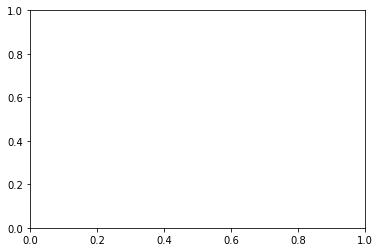

In [ ]:
# Display data table with GUI by Yulong Fan

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd


fig, ax = plt.subplots()
      
data = {"year":year, "quarter":quarter, "actual gini":gini_test, "predicted gini":Y_pred}
data_set = pd.DataFrame(data)
data_set = data_set.sort_values(by=['year','quarter'])

fig = go.Figure(data=[go.Table(header=dict(values=['Year','Quarter', 'Actual Gini Index', 'Predicted Gini Index']),
                      cells=dict(values=[data_set['year'], data_set['quarter'], data_set['actual gini'], data_set['predicted gini']]))
                          ])
fig.show()



In [ ]:
# Export data table to excel by Yulong Fan
import pandas
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = {"year":year, "quarter":quarter, "actual gini":gini_test, "predicted gini":Y_pred}
data_set = pandas.DataFrame(data)
data_set = data_set.sort_values(by=['year','quarter'])
 
# Save data as data_table.xlsx
data_set.to_excel("data_table.xlsx")

In [ ]:
# Visualization of data by Yulong Fan

import pandas
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = {"year":year, "quarter":quarter, "actual gini":gini_test, "predicted gini":Y_pred}
data_set = pandas.DataFrame(data)
data_set = data_set.sort_values(by=['year','quarter'])


year = data_set['year']
actual_gini = data_set['actual gini']

predicted_gini = data_set['predicted gini']

fig, ax = plt.subplots()
ax.plot(year, actual_gini, 'g-')
ax.plot(year, predicted_gini, 'b-')
ax.set_xlabel('Year')
ax.set_ylabel('Gini', rotation='horizontal')
ax.legend(['Actual', 'Predicted'])
    

fig.show()
plt.title('actual vs predicted gini index')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-2ea90956d35f>", line 8, in <module>
    data = {"year":year, "quarter":quarter, "actual gini":gini_test, "predicted gini":Y_pred}
NameError: name 'year' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File 

NameError: ignored